In [1]:
import numpy as np

grid_file = "..//data//naca0012.grd"

nnodes, nedges, ncells = np.loadtxt(grid_file, max_rows=1, dtype=int)

In [2]:
xy = np.loadtxt(grid_file, skiprows=1, max_rows=nnodes, dtype=float)
iedge = np.loadtxt(grid_file, skiprows=1+nnodes, max_rows=nedges, dtype=int)
icell = np.loadtxt(grid_file, skiprows=1+nnodes+nedges, max_rows=ncells, dtype=int) - 1
vol = np.loadtxt(grid_file, skiprows=1+nnodes+nedges+ncells, max_rows=ncells, dtype=float)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

[matplotlib.tri 文档](https://matplotlib.org/stable/gallery/images_contours_and_fields/triplot_demo.html)

In [4]:
triangle = tri.Triangulation(xy.T[0], xy.T[1], icell)

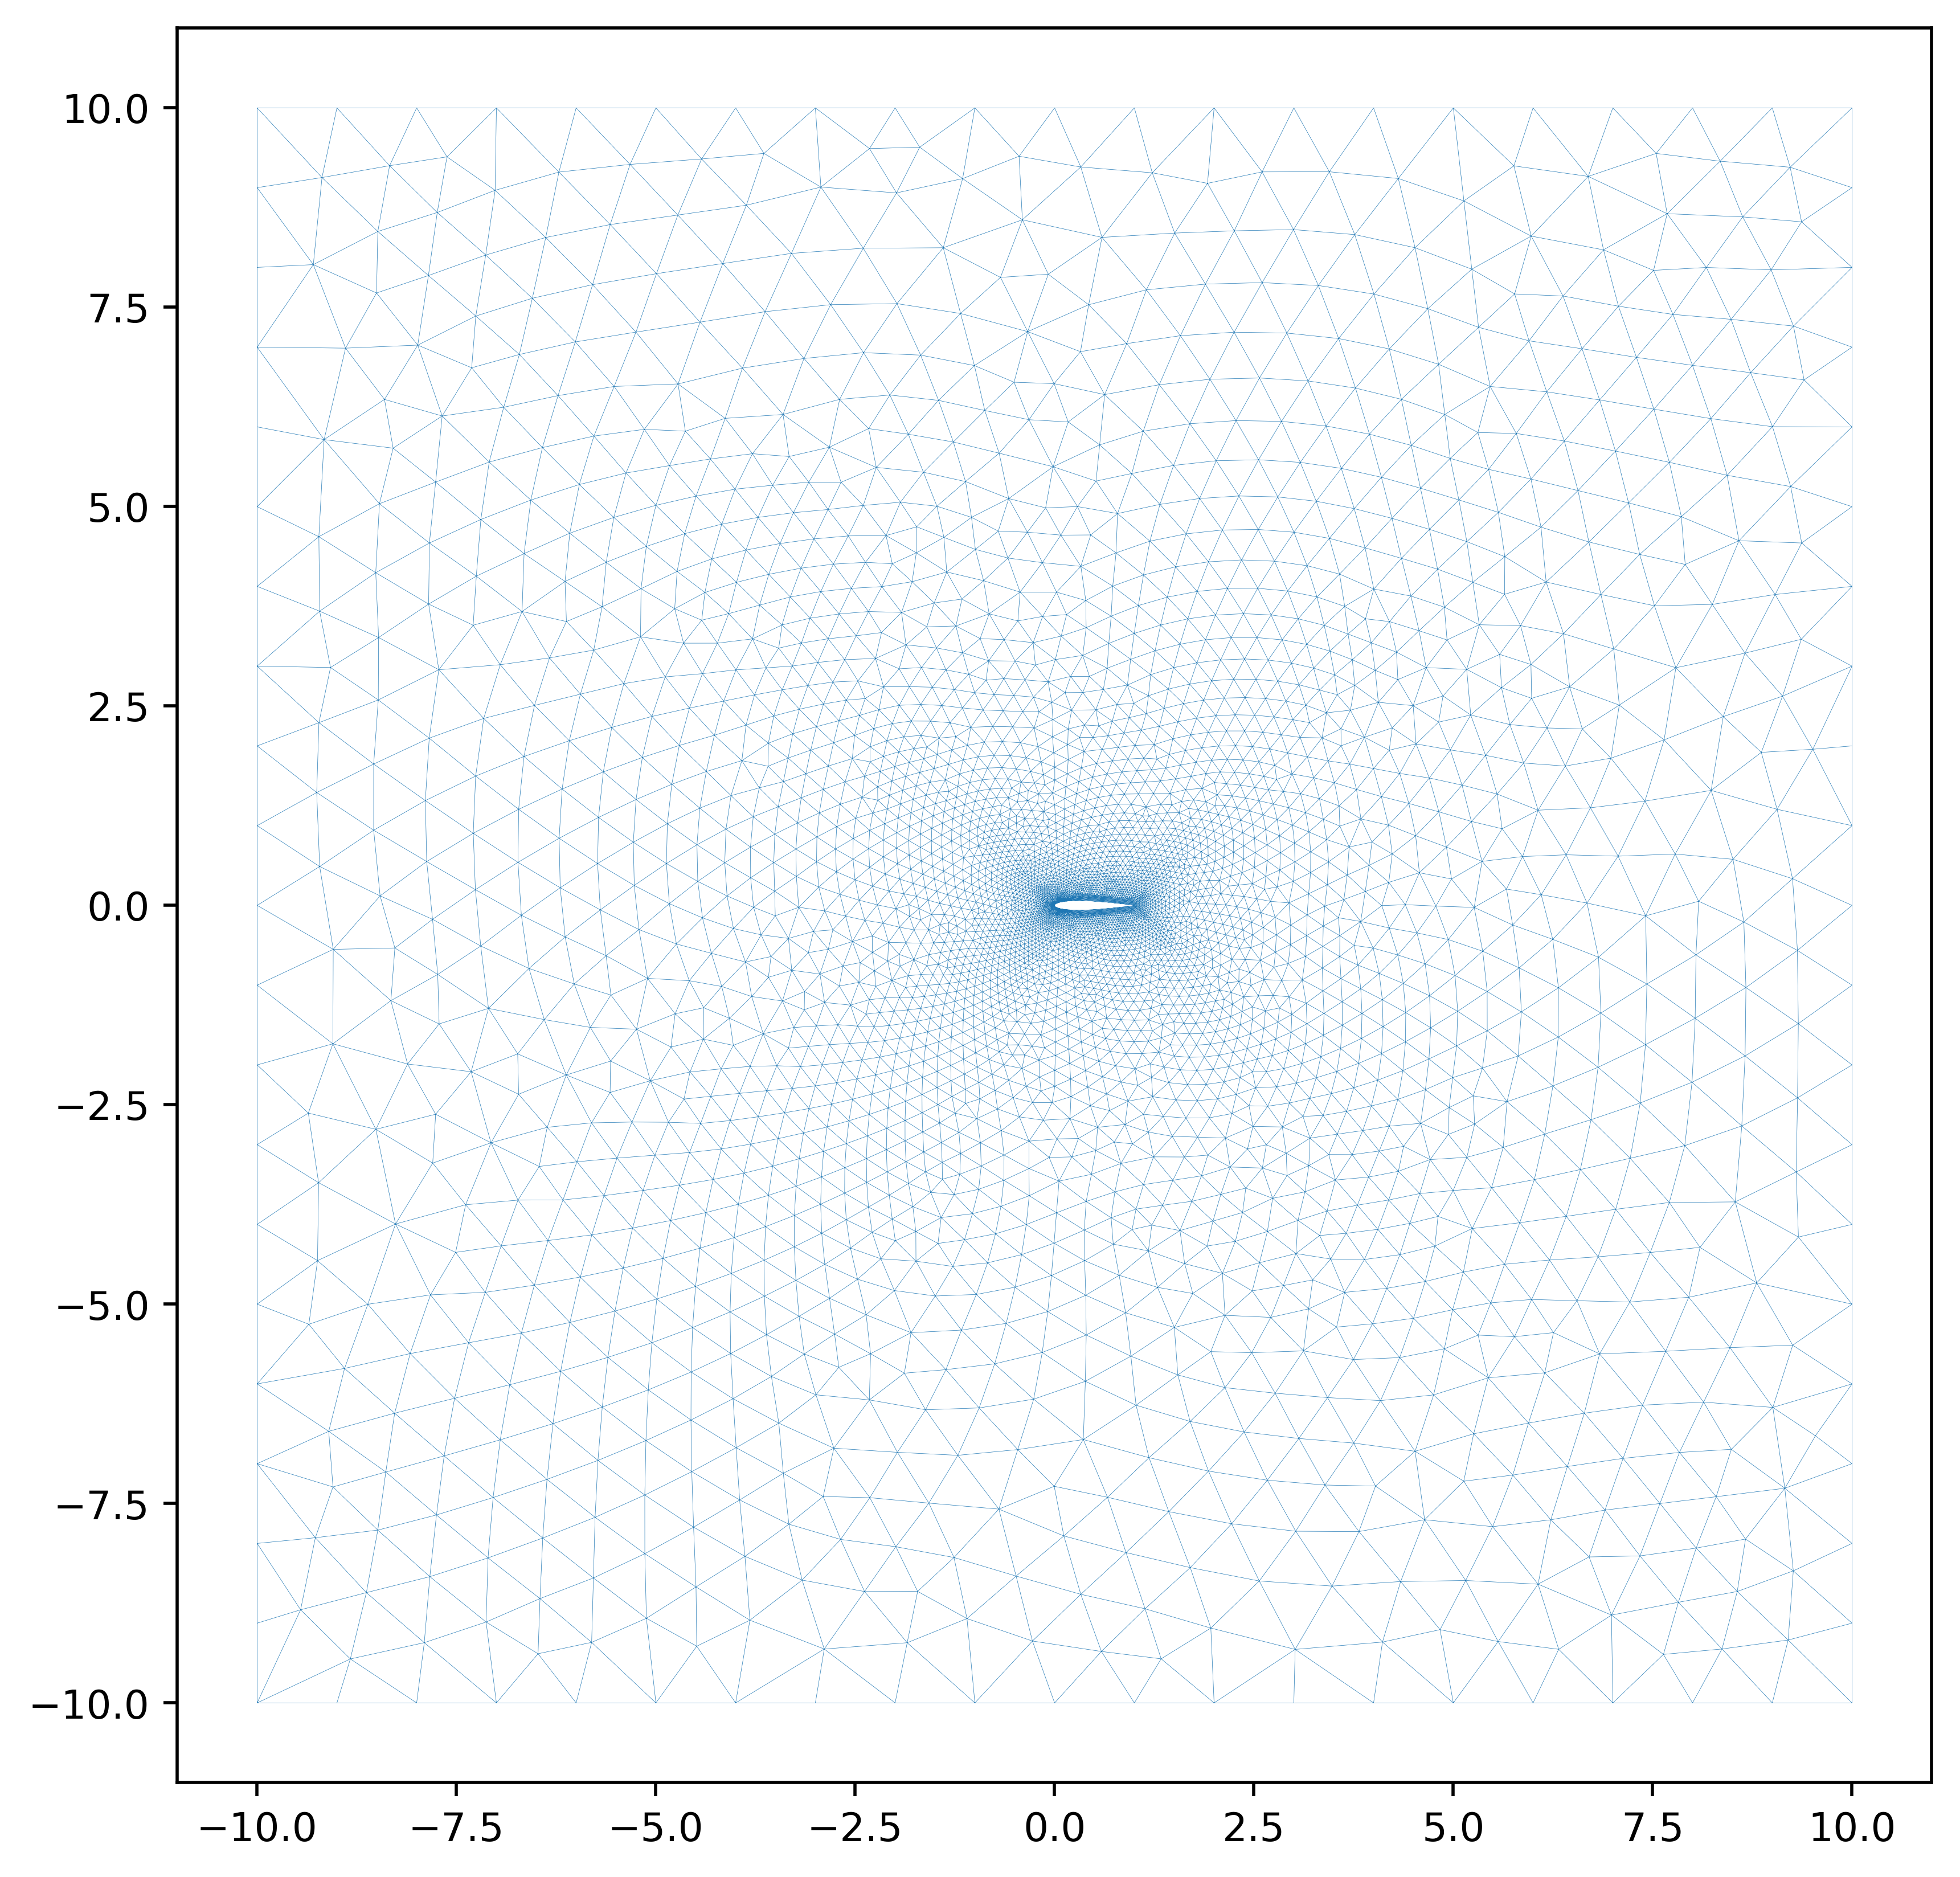

In [5]:
plt.figure(figsize=(12, 8), facecolor="white", dpi=500)
plt.gca().set_aspect(1)
plt.triplot(triangle, lw=0.1)
plt.show()

In [6]:
class Case:
    
    def __init__(self, Ma_inf, alpha):
        self.Ma_inf = Ma_inf
        self.alpha = alpha * np.pi / 180
        self.T_inf = 1.0
        self.C_inf = 1.0
        self.P_inf = 1.0
        self.rho_inf = 1.4
        self.R = 1 / 1.4
        self.gamma = 1.4
        self.Cv = self.R / (self.gamma - 1.0)
        self.calculate_conserve_inf()
        self.k2 = 0.8
        self.k4 = 3e-3
        self.CFL = 2.0
        self.error = 1e-5
        self.STEP = 5000
        self.data_path = ".//data//"
        self.image_path = ".//image//"
        pass
    
    def calculate_conserve_inf(self):
        w_inf = np.zeros(4)
        w_inf[0] = self.rho_inf
        U_inf = self.Ma_inf * self.C_inf * np.cos(self.alpha)
        V_inf = self.Ma_inf * self.C_inf * np.sin(self.alpha)
        w_inf[1] = self.rho_inf * U_inf
        w_inf[2] = self.rho_inf * V_inf
        E_inf = self.P_inf / (self.gamma - 1) / self.rho_inf + (U_inf**2 + V_inf**2) / 2
        w_inf[3] = self.rho_inf * E_inf
        self.w_inf = w_inf
        pass

In [7]:
class Grid:
    
    def __init__(self, grid_file):
        nnodes, nedges, ncells = np.loadtxt(grid_file, max_rows=1, dtype=int)
        xy = np.loadtxt(grid_file, skiprows=1, max_rows=nnodes, dtype=float)
        iedge = np.loadtxt(grid_file, skiprows=1+nnodes, max_rows=nedges, dtype=int)
        icell = np.loadtxt(grid_file, skiprows=1+nnodes+nedges, max_rows=ncells, dtype=int) - 1
        vol = np.loadtxt(grid_file, skiprows=1+nnodes+nedges+ncells, max_rows=ncells, dtype=float)
        self.nnodes = nnodes
        self.nedges = nedges
        self.ncells = ncells
        self.xy = xy
        self.iedge = iedge
        self.icell = icell
        self.vol = vol
        pass
    
    def plot_grid(self, image_name):
        triangle = tri.Triangulation(self.xy.T[0], self.xy.T[1], self.icell)
        plt.figure(figsize=(12, 8), facecolor="white", dpi=500)
        plt.gca().set_aspect(1)
        plt.triplot(triangle, lw=0.1, color="r")
        plt.xlim(-2, 3)
        plt.ylim(-2.5, 2.5)
        plt.savefig(image_name, bbox_inches="tight")
        plt.show()
        pass

In [8]:
g = Grid(grid_file)

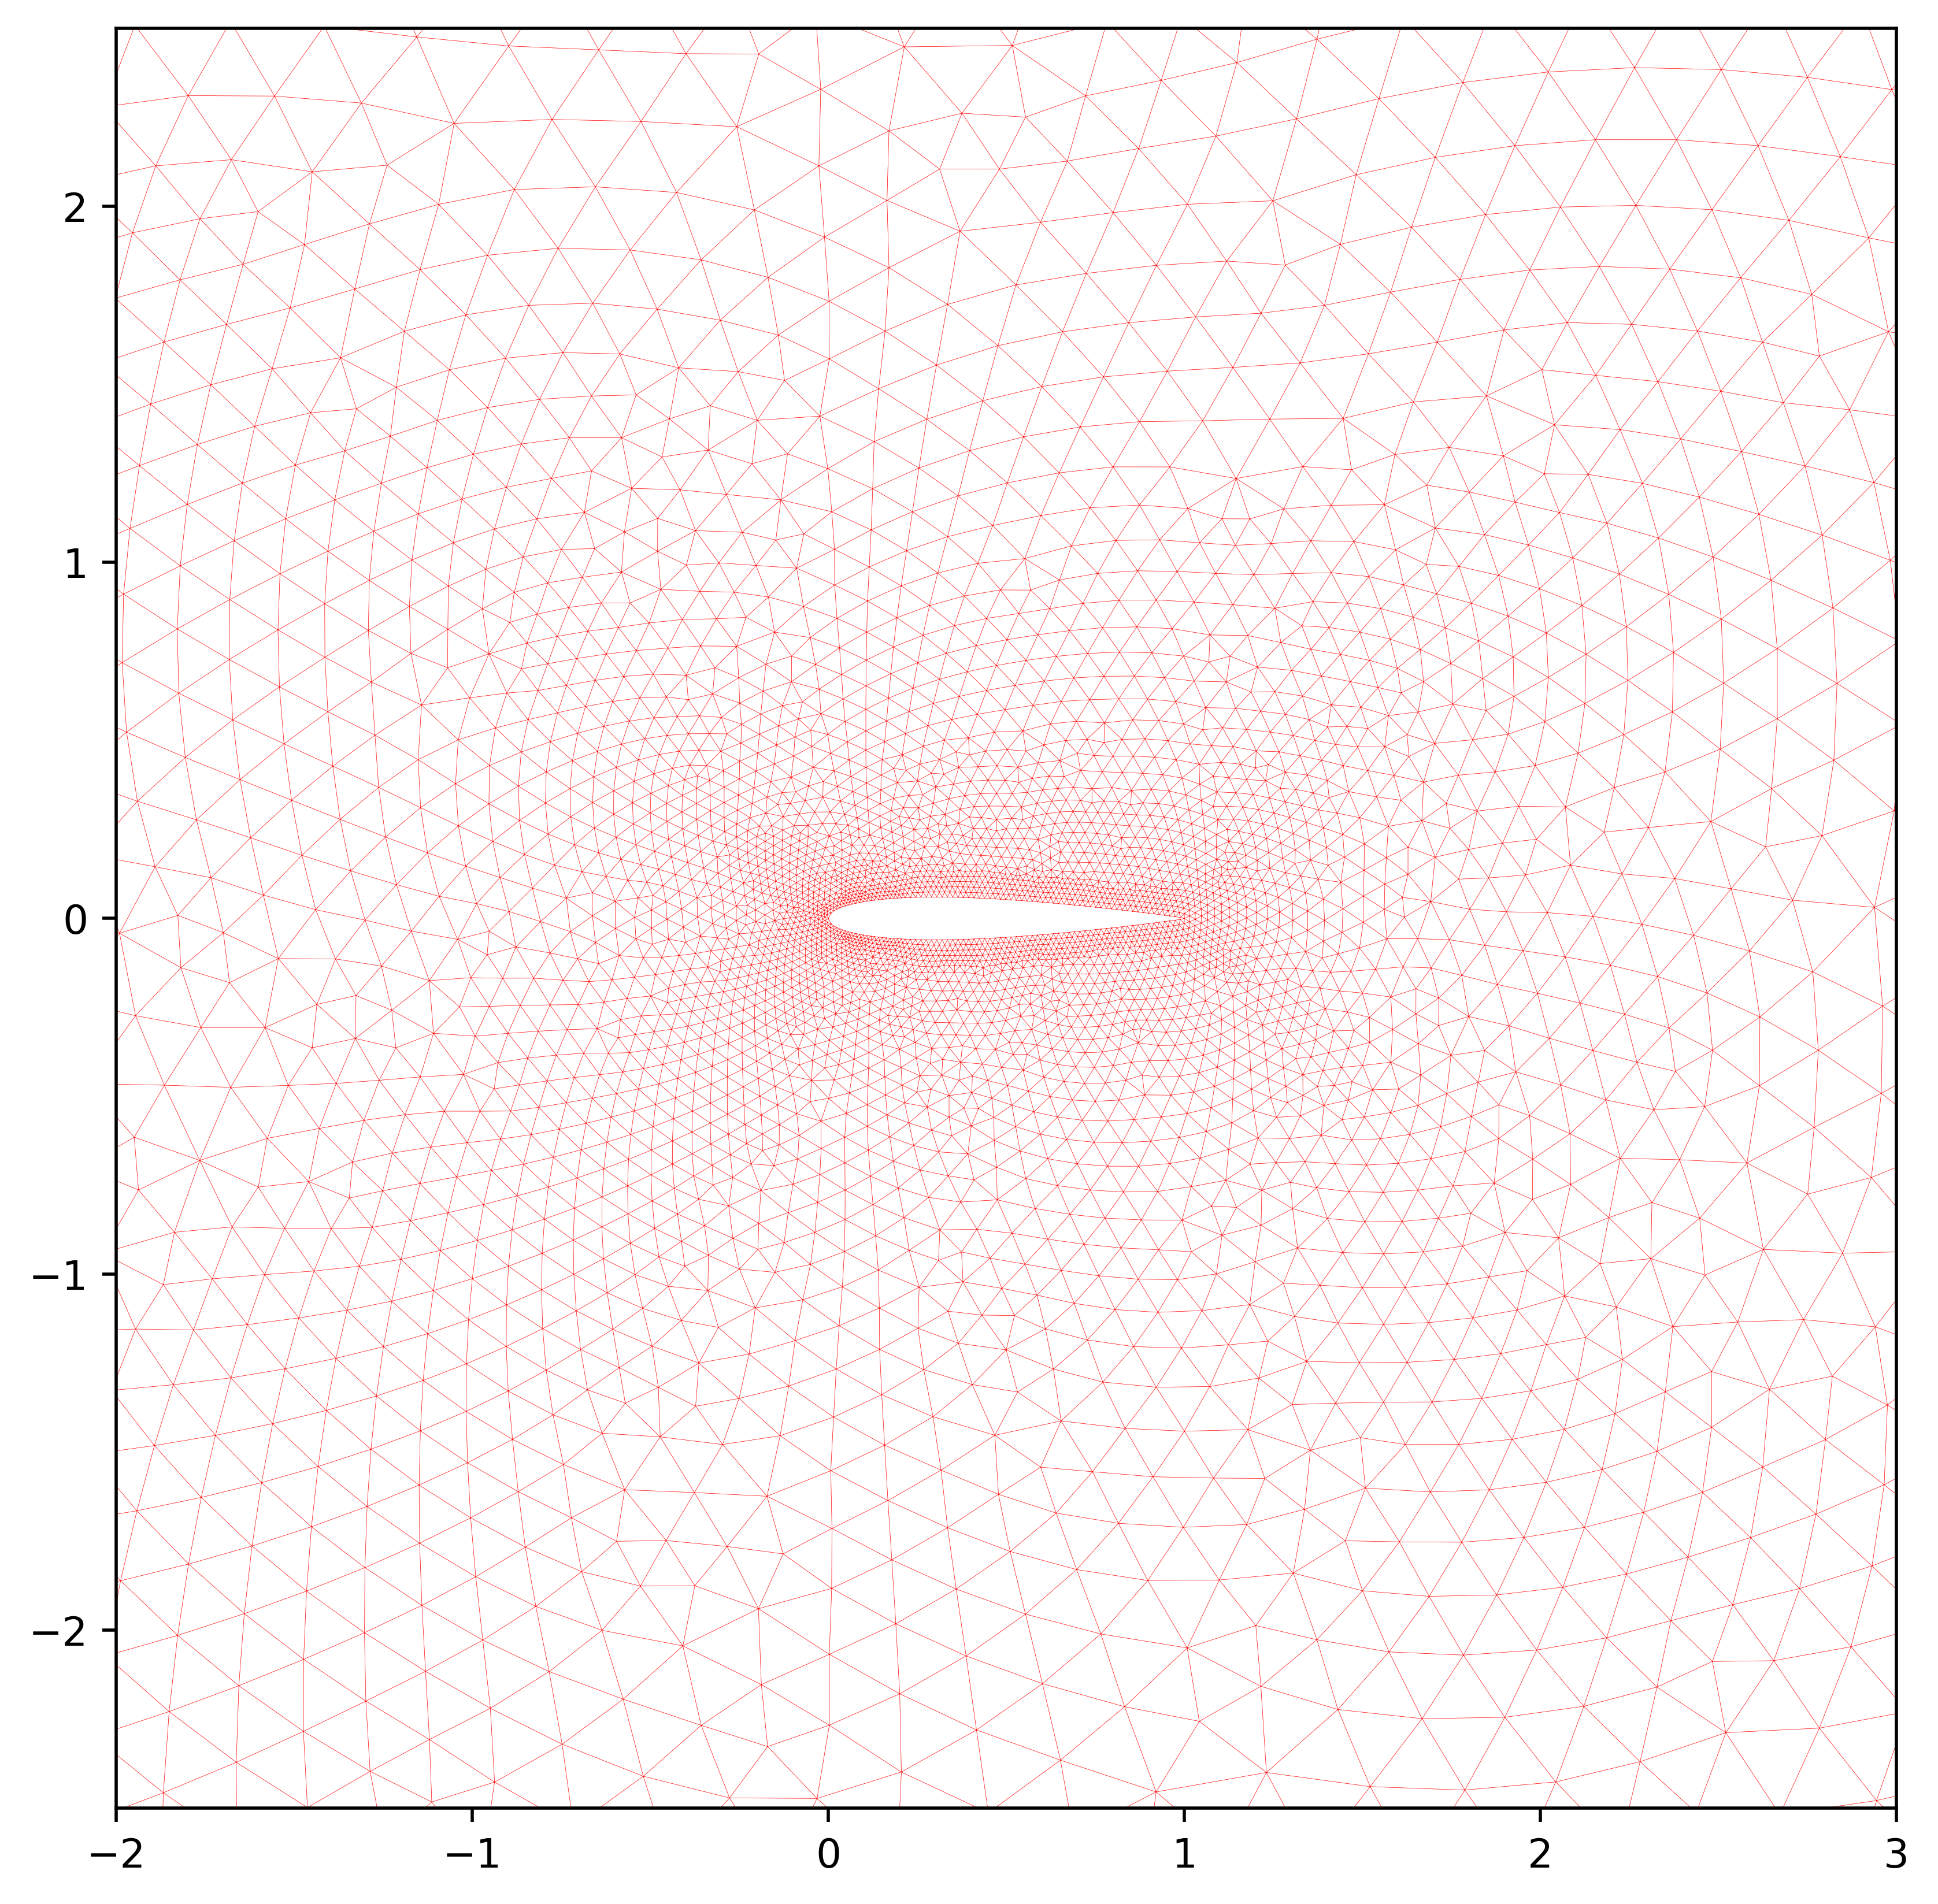

In [9]:
name = "..//image//grid_class.png"
g.plot_grid(name)